# 20171CSE0680 201710100852 Srinag Marni
# 20171CSE0686 201710100858 Sujaya V Shetty

# Project : Stock Price Dashboard
1. Download the adjusted close price for AAPL, INTC, EBAY and AMZN for the last 60 months. You can
use any of these sources of the data:
To install pandas-datareader package, use the following command from the command prompt window
(terminal window on Mac): conda install pandas-datareader or pip install pandas-datareader
Quandl (recommended):
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2013, 2, 28)
end = datetime.datetime(2018, 2, 28)
aapl = web.DataReader('WIKI/AAPL', 'quandl', start, end)
Yahoo! Finance (unstable, often fails):
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2013, 2, 28)
end = datetime.datetime(2018, 2, 28)
aapl = web.DataReader('AAPL', 'yahoo', start, end)
You can find more information on pandas-datareader package here - https://pandasdatareader.readthedocs.io/en/latest/ (https://pandas-datareader.readthedocs.io/en/latest/) (Links to an
external site.)Links to an external site.
1. Select the adjusted monthend close price for each of the stocks.
2. Plot a line chart for adjusted close price for each stock
3. Calculate the monthly return over the period for each stock using the “shift trick” (Note: you should end
up with a time series 59 months long)
4. Plot the autocorrelation of the monthly returns. Are they autocorrelated? Why or why not?
5. Calculate the moving average for 20 days and 50 days
6. Calculate number of days the stock is bearish, bullish or neutral. Plot a Barchart to show this data
Design Dashboard
1. Develop the stock market dashboard from the details collected above. Use Flask as a server, HTML,
Bootstrap, CSS for web development
Reference : https://www.moneycontrol.com/india/stockpricequote/computerssoftware/tataconsultancyservices/TCS (https://www.moneycontrol.com/india/stockpricequote/computerssoftware/tataconsultancyservices/TCS)
Deploy the webapp
1. Deploy the webapp using heroku
https://www.heroku.com/ (https://www.heroku.com/)
Bonus
Upload the source code to github account
Display the realtime stock price on dashboard
Shoutout your work in social media(LinkedIn, Facebook or twitter)
Tip
Use bitbucket for code sharing

In [4]:
import pandas_datareader.data as web
import quandl as q
import datetime as d
key='X6mZSY79yeySfpCVJaKg'
start = d.datetime(2013, 2, 28)
end = d.datetime(2018, 2, 28)
apple = web.DataReader('WIKI/AAPL', 'quandl', start, end,api_key=key)
intel=web.DataReader('WIKI/INTC', 'quandl', start, end,api_key=key)
ebay=web.DataReader('WIKI/EBAY', 'quandl', start, end,api_key=key)
amazon=web.DataReader('WIKI/AMZN', 'quandl', start, end,api_key=key)

### Select the adjusted monthend close price for each of the stocks.

In [5]:
ap=apple.resample('BM').mean( )[['AdjClose']]
il=intel.resample('BM').mean( )[['AdjClose']]
eb=ebay.resample('BM').mean( )[['AdjClose']]
am=amazon.resample('BM').mean( )[['AdjClose']]

In [6]:
ap.head()

,AdjClose
Date,
2013-02-28,57.562728
2013-03-29,57.620265
2013-04-30,54.741373
2013-05-31,58.502859
2013-06-28,55.864752


### Plot a line chart for adjusted close price for each stock

In [7]:
import matplotlib.pyplot as plt 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

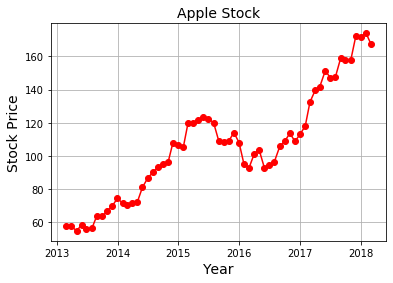

In [8]:
plt.plot(ap.index, ap.values, color='red', marker='o')
plt.title('Apple Stock', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.grid(True)
plt.savefig('apple.png')
plt.show()


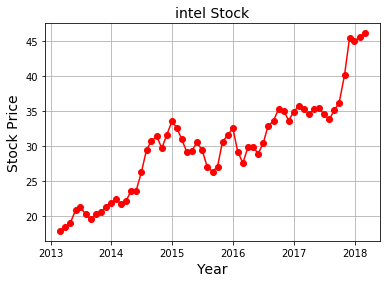

In [9]:
plt.plot(il.index, il.values, color='red', marker='o')
plt.title('intel Stock', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.grid(True)
plt.savefig('intel.png')
plt.show()


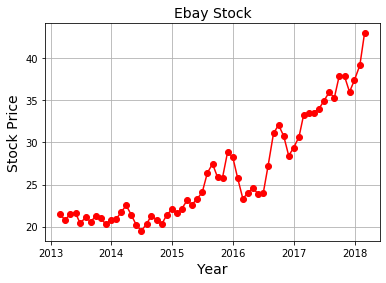

In [10]:
plt.plot(eb.index, eb.values, color='red', marker='o')
plt.title('Ebay Stock', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.grid(True)
plt.savefig('ebay.png')
plt.show()


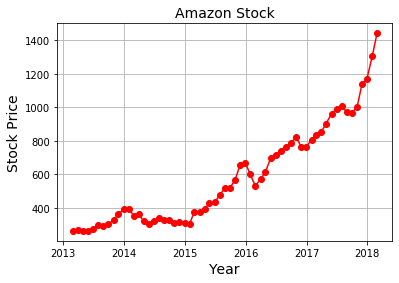

In [11]:
plt.plot(am.index, am.values, color='red', marker='o')
plt.title('Amazon Stock', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.grid(True)
plt.savefig('amazon.png')
plt.show()


### Calculate the monthly return over the period for each stock using the “shift trick” (Note: you should end up with a time series 59 months long)

In [12]:
apshift=ap/ap.shift(1)-1
apshift=apshift.dropna()
ilshift=il/il.shift(1)-1
ilshift=ilshift.dropna()
ebshift=eb/eb.shift(1)-1
ebshift=ebshift.dropna()
amshift=am/am.shift(1)-1
amshift=amshift.dropna()

In [13]:
amshift.head()

,AdjClose
Date,
2013-03-29,0.005632
2013-04-30,-0.010107
2013-05-31,-0.001310
2013-06-28,0.043293
2013-07-31,0.090751


In [14]:
apshift.shape

(60, 1)

## Plot the autocorrelation of the monthly returns. Are they autocorrelated? Why or why not?

In [15]:
from pandas.plotting import autocorrelation_plot as acp

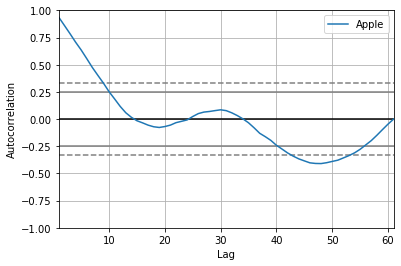

In [16]:
x=appleplot=acp(ap,label='Apple').get_figure()
x.savefig('apple3.png')

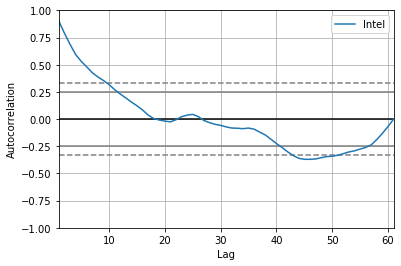

In [17]:
x=intelplot=acp(il,label='Intel').get_figure()
x.savefig('intel3.png')

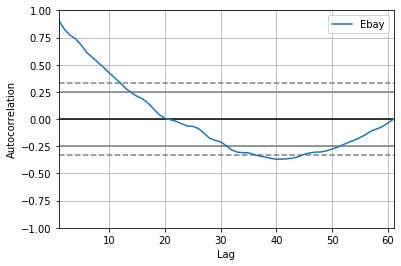

In [18]:
x=ebayplot=acp(eb,label='Ebay').get_figure()
x.savefig('ebay3.png')

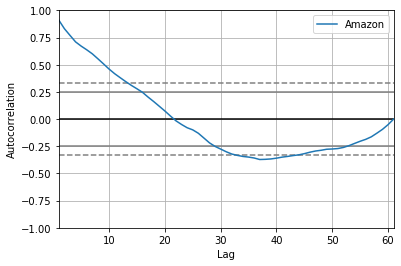

In [19]:
x=amazonplot=acp(am,label='Amazon').get_figure()
x.savefig('amazon3.png')

#### As we can observe, the data lines from all the above graphs are just above and below the first quartile, or within the 95% confidence interval. This will indicate the significance of the correlation. If the line is above or below the dotted line, not in between, we can say that the correlation is significant, and that the adjusted closed value is correlated to time. In all plots, we can see that in the first year, there is a correlation between stock price and time. we can not say that there are any significant values that show any correlation, and finally, towards the end, we can again see some significant values, and it would be beneficial to dive deeper into these observations.

### Calculate the moving average for 20 days and 50 days

In [20]:
import numpy as np
apple['20d'] = np.round(apple["AdjClose"].rolling(window=20).mean(),2)
apple["50d"] = np.round(apple["AdjClose"].rolling(window = 50).mean(), 2)
apple["200d"] = np.round(apple["AdjClose"].rolling(window = 200).mean(), 2)
intel['20d'] = np.round(intel["AdjClose"].rolling(window=20).mean(),2)
intel["50d"] = np.round(intel["AdjClose"].rolling(window = 50).mean(), 2)
intel["200d"] = np.round(intel["AdjClose"].rolling(window = 200).mean(), 2)
ebay['20d'] = np.round(ebay["AdjClose"].rolling(window=20).mean(),2)
ebay["50d"] = np.round(ebay["AdjClose"].rolling(window = 50).mean(), 2)
ebay["200d"] = np.round(ebay["AdjClose"].rolling(window = 200).mean(), 2)
amazon['20d'] = np.round(amazon["AdjClose"].rolling(window=20).mean(),2)
amazon["50d"] = np.round(amazon["AdjClose"].rolling(window = 50).mean(), 2)
amazon["200d"] = np.round(amazon["AdjClose"].rolling(window = 200).mean(), 2)



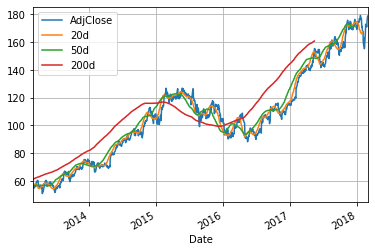

In [21]:
x=apple[['AdjClose', '20d', '50d', '200d']].plot(grid=True).get_figure()
x.savefig('apple2.png')

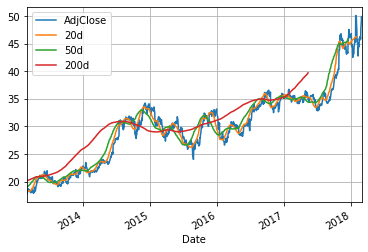

In [22]:
x=intel[['AdjClose', '20d', '50d', '200d']].plot(grid=True).get_figure()
x.savefig('intel2.png')

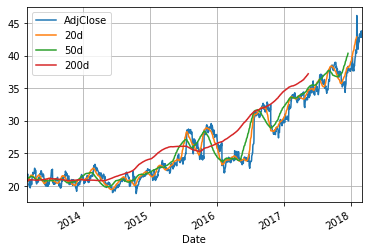

In [23]:
x=ebay[['AdjClose', '20d', '50d', '200d']].plot(grid=True).get_figure()
x.savefig('ebay2.png')

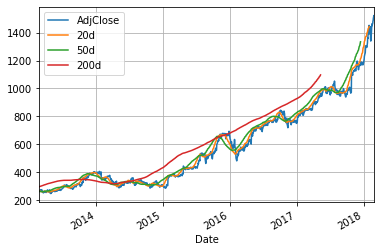

In [24]:
x=amazon[['AdjClose', '20d', '50d', '200d']].plot(grid=True).get_figure()
x.savefig('amazon2.png')

## Calculate number of days the stock is bearish, bullish or neutral. Plot a Barchart to show this data Design Dashboard

In [25]:
apple['20d-50d'] = apple['20d'] - apple['50d']
#if > 0 then regime = 1 else 0
apple['Regime'] = np.where(apple['20d-50d'] > 0, 1, 0)
#if < 0 then regime = -1 else regime
apple["Regime"] = np.where(apple['20d-50d'] < 0, -1, apple["Regime"])
app=apple["Regime"].value_counts()

intel['20d-50d'] =intel['20d'] - intel['50d']
#if > 0 then regime = 1 else 0
intel['Regime'] = np.where(intel['20d-50d'] > 0, 1, 0)
#if < 0 then regime = -1 else regime
intel["Regime"] = np.where(intel['20d-50d'] < 0, -1, intel["Regime"])
itl=intel["Regime"].value_counts()

ebay['20d-50d'] = ebay['20d'] - ebay['50d']
#if > 0 then regime = 1 else 0
ebay['Regime'] = np.where(ebay['20d-50d'] > 0, 1, 0)
#if < 0 then regime = -1 else regime
ebay["Regime"] = np.where(ebay['20d-50d'] < 0, -1, ebay["Regime"])
eba=ebay["Regime"].value_counts()

amazon['20d-50d'] = amazon['20d'] - amazon['50d']
#if > 0 then regime = 1 else 0
amazon['Regime'] = np.where(amazon['20d-50d'] > 0, 1, 0)
#if < 0 then regime = -1 else regime
amazon["Regime"] = np.where(amazon['20d-50d'] < 0, -1, amazon["Regime"])
ama=amazon["Regime"].value_counts()
y=['Bearish','Bullish','Neutral']

In [26]:
apple["Regime"].value_counts()

-1    825
 1    382
 0     51
Name: Regime, dtype: int64

### Above indicates that for 825 days the market was bearish on Apple, while for 382 days the market was bullish, and it was neutral for 51 days.

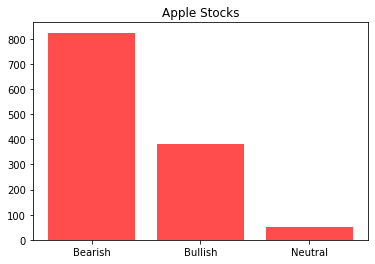

In [27]:
plt.bar(y,app, align='center', alpha=0.7,color='red')
plt.title('Apple Stocks')
plt.savefig('apple1.png')

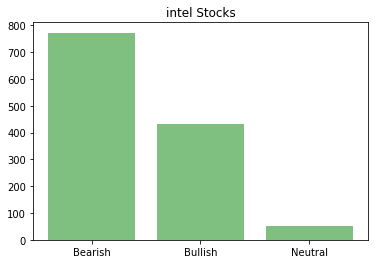

In [28]:
plt.bar(y,itl, align='center', alpha=0.5,color='green')
plt.title('intel Stocks')
plt.savefig('intel1.png')

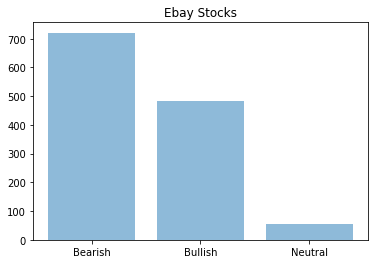

In [29]:
plt.bar(y,eba, align='center', alpha=0.5)
plt.title('Ebay Stocks')
plt.savefig('ebay1.png')

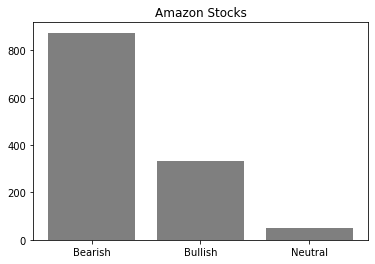

In [30]:
plt.bar(y,ama, align='center', alpha=0.5,color='black')
plt.title('Amazon Stocks')
plt.savefig('amazon1.png')

## Develop the stock market dashboard from the details collected above. Use Flask as a server, HTML, Bootstrap, CSS for web development Reference :

# **Note Run the file in root directery to generate latest gpahcs for the website

## Deploy the webapp using heroku https://www.heroku.com/ (https://www.heroku.com/) Bonus Upload the source code to github account Display the realtime stock price on dashboard Shoutout your work in social media(LinkedIn, Facebook or twitter) Tip Use bitbucket for code sharing

# **Note our Stock Dashboard has been hosted @ https://20171cse0680.github.io/plot/

# https://cse686.github.io/stockprice/

# **Note completed full root folder can be found @ https://github.com/20171CSE0680/plot

# https://github.com/CSE686/stockprice